# Potential Energy Curve for a Homonuclear Diatomic Molecule



## Setup python environment and imports

In [1]:
%%capture
!pip install pyscf


In [2]:
# pyscf imports:
from pyscf import gto, scf

from pyscf.data.nist import HARTREE2EV

# For plotting
import matplotlib
from matplotlib import pyplot as plt

# For numerics:
import numpy as np

## Definition of the Molecule

Here you should define the homonuclear diatomic molecule to be considered.



In [3]:
Atom="N"

## Definition of the Functions to Generate the XYZ Coordiates and Calculations

In [4]:
def get_xyz(bondlength,atom="N"):
  xyz="{:2s} {:10.6f} {:10.6f} {:10.6f}\n".format(atom,bondlength/2,0.0,0.0)
  xyz+="{:2s} {:10.6f} {:10.6f} {:10.6f}\n".format(atom,-bondlength/2,0.0,0.0)
  return xyz

In [5]:
def run_calculation_hf(xyz, basis="sto-3g"):
    """Calculate the energy (+ additional things like MO coefficients) with pyscf."""
    mol = gto.M(
        atom=xyz,
        basis=basis,
        unit="ANG",
        symmetry=True,
    )
    mol.build()
    mf = scf.RHF(mol)
    mf.kernel()
    return mf.e_tot

## Hartree-Fock calculations with different basis sets

In [15]:
bondlengths = np.linspace(0.8,2.5,100)

basis_sets=["sto-3g",
            "cc-pVDZ",
            "cc-pVTZ",
            "def2-tzvpp"
            ]

energy_hf = []
for b in range(len(basis_sets)):
  energy_hf.append(np.zeros(bondlengths.size))

for i, bl in enumerate(bondlengths):
  xyz=get_xyz(bondlength=bl,atom=Atom)
  for k,e in enumerate(energy_hf):
    e[i] = run_calculation_hf(xyz,basis=basis_sets[k])

energy_hf_eV = []
for k,e in enumerate(energy_hf):
    e_eV = (e - np.min(e))*HARTREE2EV
    energy_hf_eV.append(e_eV)


converged SCF energy = -106.680802456647
converged SCF energy = -108.40735863448
converged SCF energy = -108.498849442675
converged SCF energy = -108.506115757756
converged SCF energy = -106.794607311179
converged SCF energy = -108.494807901296
converged SCF energy = -108.579043518014
converged SCF energy = -108.586140421244
converged SCF energy = -106.895929713308
converged SCF energy = -108.571467878322
converged SCF energy = -108.649042412807
converged SCF energy = -108.655976829205
converged SCF energy = -106.985897551357
converged SCF energy = -108.638399364908
converged SCF energy = -108.709878021773
converged SCF energy = -108.716654141565
converged SCF energy = -107.065529488042
converged SCF energy = -108.696552065251
converged SCF energy = -108.762472700651
converged SCF energy = -108.76909254138
converged SCF energy = -107.135780493433
converged SCF energy = -108.746802043125
converged SCF energy = -108.807673498909
converged SCF energy = -108.814137426929
converged SCF ener

### Analysis of Results

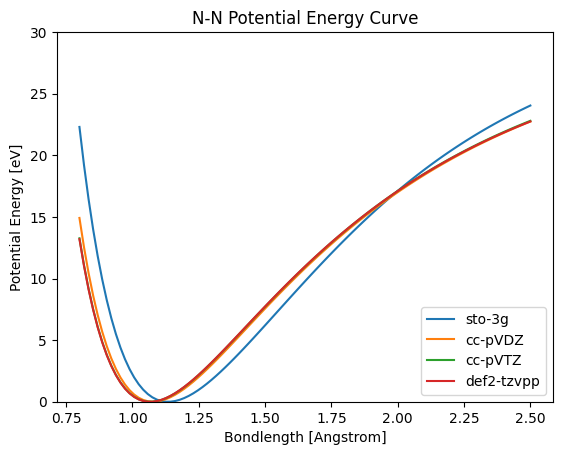

In [16]:
plt.figure(1)
for k,e_eV in enumerate(energy_hf_eV):
  plt.plot(bondlengths,e_eV,label=basis_sets[k])
plt.legend()
plt.ylim([0,30])
plt.xlabel("Bondlength [Angstrom]")
plt.ylabel("Potential Energy [eV]")
plt.title("{0}-{0} Potential Energy Curve".format(Atom))

plt.show()